# **AT&T SPAM DETECTOR**

In [1]:
!pip install --upgrade tensorflow_hub

## **1. Importing Librairies**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import tensorflow as tf
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D


from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
pd.options.display.max_colwidth = 200

## **2. Reading file and exploring data**

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
df = pd.read_csv('/content/drive/MyDrive/JEDHA-FULLSTACK/Deep Learning/Project_DL/spam.csv',encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives around here though",NaN,NaN,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [15]:
df['v1'].value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: v1, dtype: float64

The dataset is made up of 13.5% of spams. It's heavily imbalanced.

In [16]:
mask = df['Unnamed: 2'].isnull()
df.loc[~mask,:]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
95,spam,"Your free ringtone is waiting to be collected. Simply text the password \MIX\"" to 85069 to verify. Get Usher and Britney. FML",PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
281,ham,\Wen u miss someone,the person is definitely special for u..... But if the person is so special,why to miss them,"just Keep-in-touch\"" gdeve.."""
444,ham,\HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYAROUND! HOWDY GORGEOUS,"HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE JEN XXX\""""",NaN,NaN
671,spam,SMS. ac sun0819 posts HELLO:\You seem cool,"wanted to say hi. HI!!!\"" Stop? Send STOP to 62468""",NaN,NaN
710,ham,Height of Confidence: All the Aeronautics professors wer calld &amp; they wer askd 2 sit in an aeroplane. Aftr they sat they wer told dat the plane ws made by their students. Dey all hurried out o...,"this wont even start........ Datz confidence..""",NaN,NaN
899,spam,"Your free ringtone is waiting to be collected. Simply text the password \MIX\"" to 85069 to verify. Get Usher and Britney. FML",PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
1038,ham,"Edison has rightly said, \A fool can ask more questions than a wise man can answer\"" Now you know why all of us are speechless during ViVa.. GM",GN,GE,"GNT:-)"""
1127,ham,"Height of \Oh shit....!!\"" situation: A guy throws a luv letter on a gal but falls on her brothers head whos a gay",".;-):-D""",NaN,NaN
1266,ham,\Hey sorry I didntgive ya a a bellearlier hunny,"just been in bedbut mite go 2 thepub l8tr if uwana mt up?loads a luv Jenxxx.\""""",NaN,NaN
1384,ham,"Storming msg: Wen u lift d phne, u say \HELLO\"" Do u knw wt is d real meaning of HELLO?? . . . It's d name of a girl..! . . . Yes.. And u knw who is dat girl?? \""Margaret Hello\"" She is d girlfrnd...","bt not his girlfrnd... G o o d n i g h t . . .@""",NaN,NaN


In [17]:
#Replacing Nan by empty values and Concatenate all columns into one
df['Unnamed: 2'] = df['Unnamed: 2'].fillna("")
df['Unnamed: 3'] = df['Unnamed: 3'].fillna("")
df['Unnamed: 4'] = df['Unnamed: 4'].fillna("")
df['v2']=pd.concat([df['v2'],df['Unnamed: 2'],df['Unnamed: 3'],df['Unnamed: 4']], ignore_index=True)

#Keeping just the two first columns
df = df[['v1','v2']]
df.tail()

,v1,v2
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate."
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other suggestions?"
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free
5571,ham,Rofl. Its true to its name


In [18]:
#Looking for what spams look like
df.loc[df['v1']=='spam',:]

,v1,v2
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
5,spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"
8,spam,WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
9,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030
11,spam,"SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info"
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414 now! Costs 20p/min Gsex POBOX 2667 WC1N 3XX
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE MINS. INDIA CUST SERVs SED YES. L8ER GOT MEGA BILL. 3 DONT GIV A SHIT. BAILIFF DUE IN DAYS. I O å£250 3 WANT å£800
5547,spam,"Had your contract mobile 11 Mnths? Latest Motorola, Nokia etc. all FREE! Double Mins & Text on Orange tariffs. TEXT YES for callback, no to remove from records."
5566,spam,"REMINDER FROM O2: To get 2.50 pounds free call credit and details of great offers pls reply 2 this text with your valid name, house no and postcode"


In [19]:
#rename columns
df.rename(columns={"v1": "Target", "v2": "Text"}, inplace=True)

<ipython-input-19-f31cb1208e19>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"v1": "Target", "v2": "Text"}, inplace=True)


## **3. Text Preprocessing**

* ### **SpaCy**

In [20]:
!pip install spacy -q
import spacy
!python -m pip install ./en_core_web_sm-3.7.1.tar.gz

Processing ./en_core_web_sm-3.7.1.tar.gz
ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: '/content/en_core_web_sm-3.7.1.tar.gz'



In [21]:
# Import English using en_core_web_sm.load()
import en_core_web_sm
nlp = en_core_web_sm.load()
# Import Stop words
from spacy.lang.en.stop_words import STOP_WORDS

In [22]:
# Remove all non alphanumeric characters except whitespaces
df["text_clean"] = df["Text"].apply(lambda x:''.join(ch for ch in x if ch.isalnum() or ch==" "))
# removing double spaces and spaces at the beginning and end of strings
df["text_clean"] = df["text_clean"].apply(lambda x: x.replace(" +"," ").lower().strip())
# removing stop words and replacing every word with their lemma
df["text_clean"] = df["text_clean"].apply(lambda x: " ".join([token.lemma_ for token in nlp(x) if (token.lemma_ not in STOP_WORDS) & (token.text not in STOP_WORDS)]))

In [23]:
# labeling our target into 0s and 1s
df['Value'] = df['Target'].map({'ham':0,'spam':1})

In [24]:
df

,Target,Text,text_clean,Value
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",jurong point crazy available bugis n great world la e buffet cine amore wat,0
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,0
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry 2 wkly comp win fa cup final tkts 21st 2005 text fa 87121 receive entry questionstd txt ratetcs apply 08452810075over18s,1
3,ham,U dun say so early hor... U c already then say...,u dun early hor u c,0
4,ham,"Nah I don't think he goes to usf, he lives around here though",nah think usf live,0
...,...,...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.",2nd time try 2 contact u u win å750 pound prize 2 claim easy 087187272008 now1 10p minute btnationalrate,1
5568,ham,Will Ì_ b going to esplanade fr home?,ì b esplanade fr home,0
5569,ham,"Pity, * was in mood for that. So...any other suggestions?",pity mood soany suggestion,0
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,guy bitching act like d interested buy week free,0


* ### **WordCloud**

Let's take a look at the main reccurrent words in both ham and spam emails

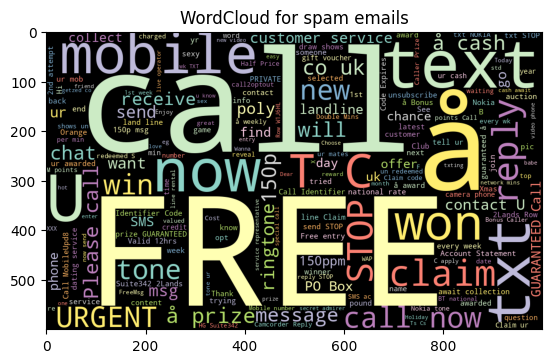

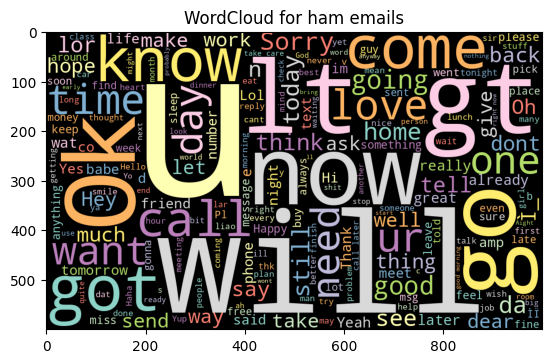

In [25]:
from wordcloud import WordCloud

for i in set(df['Target']):
    #print("WordCloud for", i)
    words = ''
    for document in df[df['Target'] == i]['Text']:
        words += document + ' '
    wordcloud = WordCloud(width=1000, height=600, background_color='black', colormap='Set3').generate(words)
    plt.imshow(wordcloud)
    plt.title("WordCloud for {} emails".format(i))
    plt.show()

The results of Wordcloud are not surprising with typical keywords such as "FREE", "CLAIM", "REPLY", "RECEIVE" or "CALL" urging to answer the spam email and being tricked

* ### **Tokenizer**

In [26]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=1000, oov_token="out_of_vocab") # instanciate the tokenizer
tokenizer.fit_on_texts(df['text_clean'])
df["text_encoded"] = tokenizer.texts_to_sequences(df['text_clean'])

* ### **Padding**

In [27]:
text_padded = tf.keras.preprocessing.sequence.pad_sequences(df["text_encoded"], padding="post")
text_padded

array([[  1, 230, 446, ...,   0,   0,   0],
       [ 10, 195, 463, ...,   0,   0,   0],
       [ 13, 299,   4, ...,   0,   0,   0],
       ...,
       [  1, 936,   1, ...,   0,   0,   0],
       [113,   1,   1, ...,   0,   0,   0],
       [  1, 319,   0, ...,   0,   0,   0]], dtype=int32)

In [28]:
#Shape
text_padded.shape

(5572, 72)

The length of the 5572 sms of the dataset is now 72

* ### **Train_Test split**

In [29]:
# Train Test Split
X_train, X_val, y_train, y_val = train_test_split(text_padded,df['Value'], test_size=0.3)

* ### **Converting to Tensor**

In [30]:
train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
val = tf.data.Dataset.from_tensor_slices((X_val, y_val))

* ### **Shuffeling and batching**

In [31]:
train_batch = train.shuffle(len(train)).batch(64)
val_batch = val.shuffle(len(val)).batch(64)

In [32]:
# Let's take a look at a batch
for text, value in train_batch.take(1):
  print(text, value)

tf.Tensor(
[[ 56 103 145 ...   0   0   0]
 [130 393   1 ...   0   0   0]
 [  1  12   1 ...   0   0   0]
 ...
 [170   1   1 ...   0   0   0]
 [113   1 952 ...   0   0   0]
 [  1   1   1 ...   0   0   0]], shape=(64, 72), dtype=int32) tf.Tensor(
[0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0], shape=(64,), dtype=int64)


## **4. Create simple model from scratch**

In [33]:
text.shape

TensorShape([64, 72])

In [34]:
vocab_size = tokenizer.num_words
model = Sequential([
                  # Word Embedding input layer
                  Embedding(vocab_size+1, output_dim=8, input_shape=[text.shape[1],],name="embedding"),#+1 for the padding value 0
                  # Gobal average pooling
                  GlobalAveragePooling1D(),
                  # Dense layer
                  Dense(16, activation='relu'),
                  # Prediction layer
                  Dense(1, activation="sigmoid")
]);

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 72, 8)             8008      
                                                                 
 global_average_pooling1d (  (None, 8)                 0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 8169 (31.91 KB)
Trainable params: 8169 (31.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
#Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [37]:
#Fitting the model
history = model.fit(train_batch,
                    epochs=50,
                    validation_data=val_batch)

Epoch 1/50
61/61 [==============================] - 2s 12ms/step - loss: 0.6323 - accuracy: 0.8621 - val_loss: 0.5608 - val_accuracy: 0.8738
Epoch 2/50
61/61 [==============================] - 0s 6ms/step - loss: 0.4918 - accuracy: 0.8626 - val_loss: 0.4123 - val_accuracy: 0.8738
Epoch 3/50
61/61 [==============================] - 0s 7ms/step - loss: 0.3912 - accuracy: 0.8626 - val_loss: 0.3526 - val_accuracy: 0.8738
Epoch 4/50
61/61 [==============================] - 0s 6ms/step - loss: 0.3634 - accuracy: 0.8626 - val_loss: 0.3376 - val_accuracy: 0.8738
Epoch 5/50
61/61 [==============================] - 0s 4ms/step - loss: 0.3514 - accuracy: 0.8626 - val_loss: 0.3257 - val_accuracy: 0.8738
Epoch 6/50
61/61 [==============================] - 0s 3ms/step - loss: 0.3383 - accuracy: 0.8626 - val_loss: 0.3120 - val_accuracy: 0.8738
Epoch 7/50
61/61 [==============================] - 0s 4ms/step - loss: 0.3217 - accuracy: 0.8626 - val_loss: 0.2942 - val_accuracy: 0.8738
Epoch 8/50
61/61 [=

## **5. Evaluation of the model**

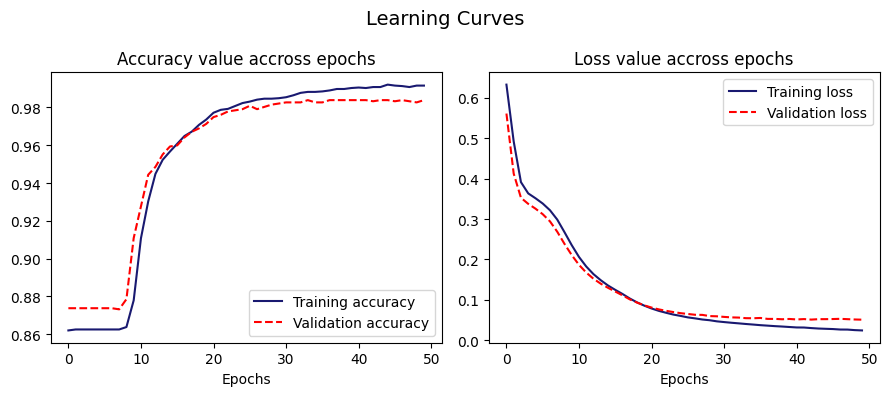

In [38]:
#Subplot
fig, ax = plt.subplots(1, 2, figsize=(9, 4))

# Plotting accuracy on the first subplot
ax[0].plot(history.history["accuracy"], color="midnightblue",label="Training accuracy")
ax[0].plot(history.history["val_accuracy"], color="r",ls='--',label="Validation accuracy")
ax[0].set_title('Accuracy value accross epochs')
ax[0].legend()

# Plotting loss on the second subplot
ax[1].plot(history.history["loss"], color="midnightblue",label="Training loss")
ax[1].plot(history.history["val_loss"], ls='--', color="r",label="Validation loss")
ax[1].set_title("Loss value accross epochs")
ax[1].legend()

#Labelling axis x
for ax in ax:
    ax.set(xlabel='Epochs')

#Suptitle
fig.suptitle('Learning Curves', fontsize=14)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [39]:
loss, accuracy = model.evaluate(val_batch)
print("Model Accuracy :",round(accuracy*100,1),"%")

27/27 [==============================] - 0s 2ms/step - loss: 0.0512 - accuracy: 0.9839
Model Accuracy : 98.4 %


**The model gives decent results !**

The model seems to be quite good. After more or less 30-35 epochs, validation accuracy remains stable as well as the validation loss doesn't seem to decrease neither. Let's save it.

In [40]:
model.save("model.keras")

But is this possible to get even better results with a pre trained model ? Let's check this out with Transfer Learning

## **5. LSTM**

In [41]:
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, GRU, LSTM

vocab_size = 1000
model_lstm = Sequential([
                  Embedding(vocab_size+1, 64, input_shape=[text.shape[1],],name="embedding"),
                  LSTM(units=64, return_sequences=True), # maintains the sequential nature
                  LSTM(units=32, return_sequences=False), # returns the last output
                  Dense(16, activation='relu'),
                  Dense(1, activation="sigmoid")
]);

In [42]:
#Compile the model
model_lstm.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [43]:
history_model_lstm = model_lstm.fit(train_batch,
                    epochs=50,
                    validation_data=val_batch)

Epoch 1/50
61/61 [==============================] - 14s 155ms/step - loss: 0.4433 - accuracy: 0.8626 - val_loss: 0.3791 - val_accuracy: 0.8738
Epoch 2/50
61/61 [==============================] - 7s 110ms/step - loss: 0.4011 - accuracy: 0.8626 - val_loss: 0.3821 - val_accuracy: 0.8738
Epoch 3/50
61/61 [==============================] - 10s 172ms/step - loss: 0.4010 - accuracy: 0.8626 - val_loss: 0.3791 - val_accuracy: 0.8738
Epoch 4/50
61/61 [==============================] - 7s 110ms/step - loss: 0.4010 - accuracy: 0.8626 - val_loss: 0.3813 - val_accuracy: 0.8738
Epoch 5/50
61/61 [==============================] - 7s 110ms/step - loss: 0.4019 - accuracy: 0.8626 - val_loss: 0.3791 - val_accuracy: 0.8738
Epoch 6/50
61/61 [==============================] - 8s 136ms/step - loss: 0.4013 - accuracy: 0.8626 - val_loss: 0.3791 - val_accuracy: 0.8738
Epoch 7/50
61/61 [==============================] - 7s 110ms/step - loss: 0.4013 - accuracy: 0.8626 - val_loss: 0.3791 - val_accuracy: 0.8738
Epoc

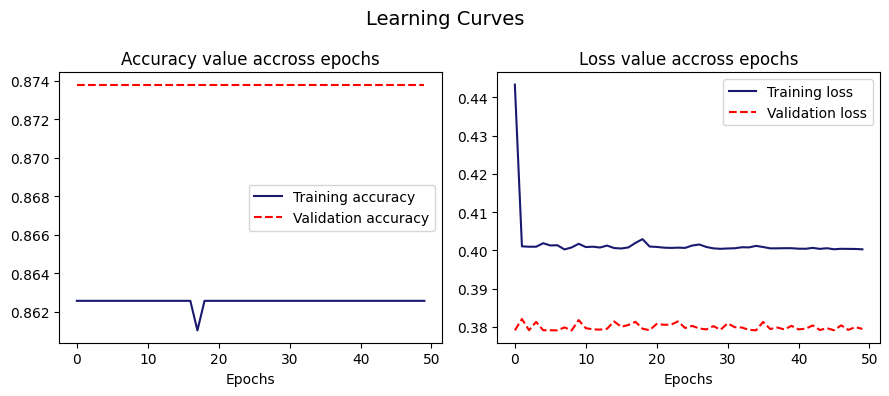

In [44]:
#Subplot
fig, ax = plt.subplots(1, 2, figsize=(9, 4))

# Plotting accuracy on the first subplot
ax[0].plot(history_model_lstm.history["accuracy"], color="midnightblue",label="Training accuracy")
ax[0].plot(history_model_lstm.history["val_accuracy"], color="r",ls='--',label="Validation accuracy")
ax[0].set_title('Accuracy value accross epochs')
ax[0].legend()

# Plotting loss on the second subplot
ax[1].plot(history_model_lstm.history["loss"], color="midnightblue",label="Training loss")
ax[1].plot(history_model_lstm.history["val_loss"], ls='--', color="r",label="Validation loss")
ax[1].set_title("Loss value accross epochs")
ax[1].legend()

#Labelling axis x
for ax in ax:
    ax.set(xlabel='Epochs')

#Suptitle
fig.suptitle('Learning Curves', fontsize=14)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [45]:
loss_lstm, accuracy_lstm = model_lstm.evaluate(val_batch)
print("Model Accuracy :",round(accuracy_lstm*100,1),"%")

27/27 [==============================] - 1s 44ms/step - loss: 0.3795 - accuracy: 0.8738
Model Accuracy : 87.4 %


Both loss and accuracy don't improve over epochs. Accuracy remains around 0.86/0.87 for validation set whereas fort training set it remains constant near 0.866. It's quite the same thing for the loss that decrease at the very start and then remains around 0.397. The validation loss varies between 0.385 et 0.41 along the 50 epochs.

## **6. GRU**

In [46]:
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, GRU, LSTM

vocab_size = 1000
model_GRU = Sequential([
                  Embedding(vocab_size+1, 64, input_shape=[text.shape[1],],name="embedding"),
                  GRU(units=64, return_sequences=True), # maintains the sequential nature
                  GRU(units=32, return_sequences=False), # returns the last output
                  Dense(16, activation='relu'),
                  Dense(1, activation="sigmoid")
])

In [47]:
#Compile the model
model_GRU.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [48]:
history_model_GRU = model_GRU.fit(train_batch,
                    epochs=50,
                    validation_data=val_batch)

Epoch 1/50
61/61 [==============================] - 13s 128ms/step - loss: 0.4698 - accuracy: 0.8513 - val_loss: 0.3834 - val_accuracy: 0.8738
Epoch 2/50
61/61 [==============================] - 7s 121ms/step - loss: 0.4010 - accuracy: 0.8626 - val_loss: 0.3792 - val_accuracy: 0.8738
Epoch 3/50
61/61 [==============================] - 7s 112ms/step - loss: 0.4013 - accuracy: 0.8626 - val_loss: 0.3796 - val_accuracy: 0.8738
Epoch 4/50
61/61 [==============================] - 6s 99ms/step - loss: 0.4014 - accuracy: 0.8626 - val_loss: 0.3792 - val_accuracy: 0.8738
Epoch 5/50
61/61 [==============================] - 6s 98ms/step - loss: 0.4014 - accuracy: 0.8626 - val_loss: 0.3797 - val_accuracy: 0.8738
Epoch 6/50
61/61 [==============================] - 8s 123ms/step - loss: 0.4009 - accuracy: 0.8626 - val_loss: 0.3792 - val_accuracy: 0.8738
Epoch 7/50
61/61 [==============================] - 7s 120ms/step - loss: 0.4004 - accuracy: 0.8626 - val_loss: 0.3832 - val_accuracy: 0.8738
Epoch 8

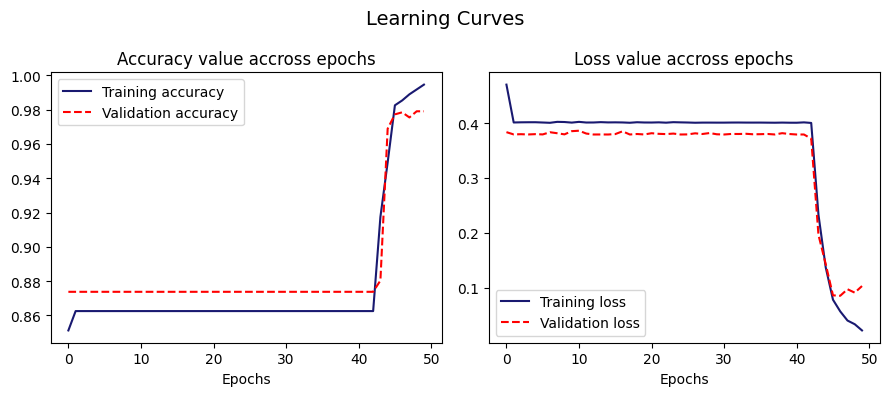

In [49]:
#Subplot
fig, ax = plt.subplots(1, 2, figsize=(9, 4))

# Plotting accuracy on the first subplot
ax[0].plot(history_model_GRU.history["accuracy"], color="midnightblue",label="Training accuracy")
ax[0].plot(history_model_GRU.history["val_accuracy"], color="r",ls='--',label="Validation accuracy")
ax[0].set_title('Accuracy value accross epochs')
ax[0].legend()

# Plotting loss on the second subplot
ax[1].plot(history_model_GRU.history["loss"], color="midnightblue",label="Training loss")
ax[1].plot(history_model_GRU.history["val_loss"], ls='--', color="r",label="Validation loss")
ax[1].set_title("Loss value accross epochs")
ax[1].legend()

#Labelling axis x
for ax in ax:
    ax.set(xlabel='Epochs')

#Suptitle
fig.suptitle('Learning Curves', fontsize=14)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Quite long training leading to clear overtfitting. Not a good model.

In [50]:
loss_gru, accuracy_gru = model_GRU.evaluate(val_batch)
print("Model Accuracy :",round(accuracy_gru*100,1),"%")

27/27 [==============================] - 1s 28ms/step - loss: 0.1035 - accuracy: 0.9791
Model Accuracy : 97.9 %


In [69]:
results = pd.DataFrame({'Simple Model': [accuracy,loss],
                        'LSTM model': [accuracy_lstm, loss_lstm],
                        'GRU model': [accuracy_gru, loss_gru],
                        'Bert model':[accuracy_bert,loss_bert]},
                                      index=['Accuracy','Loss'])

In [70]:
results.T

,Accuracy,Loss
Simple Model,0.983852,0.051227
LSTM model,0.873804,0.379497
GRU model,0.979067,0.103496
Bert model,0.971292,0.100686


In conclusion, the better results came from the simplest model that we started from scratch. For quite simple purposes as ours, the simpler the better.

## **5. Transfer Learning**

### Importing a pre-trained model (BERT)

In [53]:
!pip install tensorflow_text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 20.9 MB/s eta 0:00:00


In [66]:
X_train, X_val, y_train, y_val = train_test_split(df['text_clean'], df['Value'], test_size=0.3)

train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
val = tf.data.Dataset.from_tensor_slices((X_val, y_val))

train_batch = train.shuffle(len(train)).batch(64)
val_batch = val.shuffle(len(val)).batch(64)

import tensorflow_text

text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)
preprocessor = hub.KerasLayer(
    "https://kaggle.com/models/tensorflow/bert/frameworks/TensorFlow2/variations/en-uncased-preprocess/versions/3")
encoder_inputs = preprocessor(text_input)
encoder = hub.KerasLayer(
    "https://www.kaggle.com/models/tensorflow/bert/frameworks/TensorFlow2/variations/bert-en-uncased-l-2-h-128-a-2/versions/2",
    trainable=False)
outputs = encoder(encoder_inputs)
pooled_output = outputs["pooled_output"]      # [batch_size, 768]
sequence_output = outputs["sequence_output"]  # [batch_size, seq_length, 768]

out = tf.keras.layers.Dropout(0.2,name='dropout')(pooled_output)
out = tf.keras.layers.Dense(16,activation='relu')(out)
out = tf.keras.layers.Dense(1,activation='sigmoid',name='output')(out)

bert_model=tf.keras.Model(inputs=[text_input],outputs=[out])

bert_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_bert_model = bert_model.fit(train_batch,
                    epochs=50,
                    validation_data=val_batch)

Epoch 1/50
61/61 [==============================] - 29s 439ms/step - loss: 0.3813 - accuracy: 0.8244 - val_loss: 0.2377 - val_accuracy: 0.8708
Epoch 2/50
61/61 [==============================] - 28s 459ms/step - loss: 0.1945 - accuracy: 0.9185 - val_loss: 0.1699 - val_accuracy: 0.9390
Epoch 3/50
61/61 [==============================] - 26s 423ms/step - loss: 0.1599 - accuracy: 0.9362 - val_loss: 0.1542 - val_accuracy: 0.9444
Epoch 4/50
61/61 [==============================] - 28s 458ms/step - loss: 0.1471 - accuracy: 0.9418 - val_loss: 0.1460 - val_accuracy: 0.9468
Epoch 5/50
61/61 [==============================] - 28s 457ms/step - loss: 0.1372 - accuracy: 0.9497 - val_loss: 0.1410 - val_accuracy: 0.9504
Epoch 6/50
61/61 [==============================] - 28s 461ms/step - loss: 0.1333 - accuracy: 0.9510 - val_loss: 0.1377 - val_accuracy: 0.9510
Epoch 7/50
61/61 [==============================] - 26s 422ms/step - loss: 0.1307 - accuracy: 0.9500 - val_loss: 0.1317 - val_accuracy: 0.9551

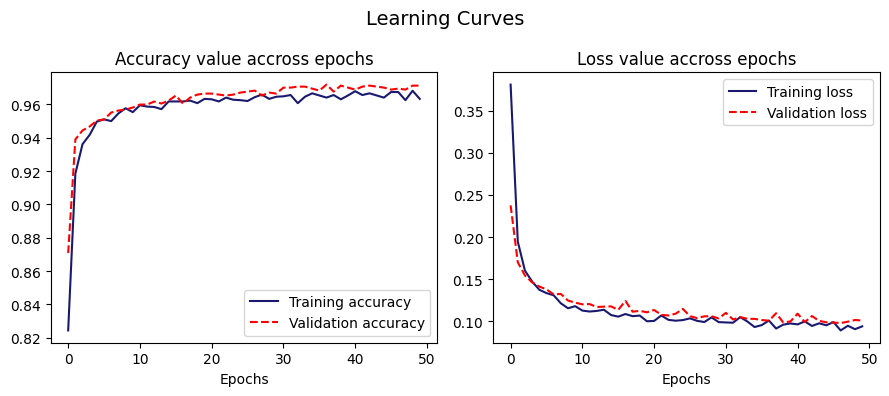

In [67]:
#Subplot
fig, ax = plt.subplots(1, 2, figsize=(9, 4))

# Plotting accuracy on the first subplot
ax[0].plot(history_bert_model.history["accuracy"], color="midnightblue",label="Training accuracy")
ax[0].plot(history_bert_model.history["val_accuracy"], color="r",ls='--',label="Validation accuracy")
ax[0].set_title('Accuracy value accross epochs')
ax[0].legend()

# Plotting loss on the second subplot
ax[1].plot(history_bert_model.history["loss"], color="midnightblue",label="Training loss")
ax[1].plot(history_bert_model.history["val_loss"], ls='--', color="r",label="Validation loss")
ax[1].set_title("Loss value accross epochs")
ax[1].legend()

#Labelling axis x
for ax in ax:
    ax.set(xlabel='Epochs')

#Suptitle
fig.suptitle('Learning Curves', fontsize=14)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [68]:
loss_bert, accuracy_bert = bert_model.evaluate(val_batch)
print("Bert Model Accuracy :",round(accuracy_bert*100,1),"%")

27/27 [==============================] - 8s 310ms/step - loss: 0.1007 - accuracy: 0.9713
Bert Model Accuracy : 97.1 %


In [ ]:
The learning is quite faster than for previous models. That's logic given bert has been pre trained over millions of words and parameters.

In [ ]:
results = pd.DataFrame({'Simple Model': [accuracy,loss],
                        'LSTM model': [accuracy_lstm, loss_lstm],
                        'GRU model': [accuracy_gru, loss_gru],
                        'Bert model':[accuracy_bert,loss_bert]},
                                      index=['Accuracy','Loss'])

In [ ]:
results.T

,Accuracy,Loss
Simple Model,0.983852,0.051227
LSTM model,0.873804,0.379497
GRU model,0.979067,0.103496
Bert model,0.971292,0.100686


In conclusion, the better results came from the simplest model that we started from scratch. For quite simple purposes as ours, the simpler the better. Our model gave very good results but our dataset was quite light. Indeed, we're not sure that our small model would be able to generalize on a much larger amount of messages.